In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from general_helper import *

rp = pd.read_csv('data/prefiltered_results.csv').drop(columns = 'Unnamed: 0')

In [7]:
null_output_counts(rp)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,64341
test_id,0,61087
obs_duration_mean,1.77803,310
obs_duration_unit,0.296856,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.69968,8
conc1_mean,4.07361,9497
conc1_unit,0.00777109,61


In [5]:
to_drop_spec = rp[rp.species.isnull()].index
rp.drop(index = to_drop_spec, inplace = True)

In [20]:
null_output_counts(rp)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,64146
test_id,0,60904
obs_duration_mean,1.78031,310
obs_duration_unit,0.29464,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.70789,8
conc1_mean,4.07976,9474
conc1_unit,0.00779472,60


In [6]:
to_drop_fam = rp[rp.family.isnull()].index
rp.drop(index = to_drop_fam, inplace = True)

In [22]:
null_output_counts(rp)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,64142
test_id,0,60900
obs_duration_mean,1.78042,310
obs_duration_unit,0.294659,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.70805,8
conc1_mean,4.08001,9471
conc1_unit,0.0077952,60


In [24]:
# prendo i pesci testati
rp[['class','tax_order', 'family', 'genus', 'species', 'gen_spec']].drop_duplicates()\
.reset_index(drop = True).to_csv('data/fish_tested.csv')

In [15]:
# prendo i composti testati
pd.Series(rp.test_cas.unique(), name = 'test_cas').to_csv('data/cas_number.csv')

# Tested Species Analysis

In [1]:
from general_helper import *
################################
ft = pd.read_csv('data/fish_tested.csv').drop(columns = 'Unnamed: 0')

In [6]:
print('class: {}'.format(len(ft.drop_duplicates()['class'].unique())))
print('tax_order: {}'.format(len(ft.drop_duplicates()['tax_order'].unique())))
print('family: {}'.format(len(ft.drop_duplicates()['family'].unique())))
print('genus: {}'.format(len(ft.drop_duplicates()['genus'].unique())))
print('species: {}'.format(len(ft.drop_duplicates()['species'].unique())))

class: 3
tax_order: 29
family: 106
genus: 322
species: 514


In [3]:
checkTree(ft.drop(columns=['gen_spec'])) # --> può non servire unire genus con species

Tutto ok, è un albero


In [2]:
# per una nuova rappresentazione basta mandare la cella con questo simbolo #######################################
from ete3 import Tree, TreeStyle

new_tree = df_to_newick(ft)

t = Tree(new_tree, format = 8)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -360 # 0 degrees = 3 o'clock
ts.arc_span = 360
t.show(tree_style=ts)

# Chemical Analysis

- SMILES --> CirPy
- Pubchem2d --> PubchemPy

In [3]:
from general_helper import *

cas = pd.read_csv('data/cas_number.csv').drop(columns = 'Unnamed: 0')

In [28]:
# find_smiles
print(ctime())
smiles = cas.test_cas.apply(find_smiles)
print(ctime())

Mon Aug 24 14:36:11 2020
Mon Aug 24 15:03:48 2020


In [44]:
# replace None values with null values
smiles.fillna('NaN', inplace = True)

In [46]:
# create table with cas number and smiles
cas_to_smiles = pd.DataFrame({'test_cas':cas.test_cas, 'smiles':smiles})
cas_to_smiles.to_csv('data/cas_to_smiles.csv')

In [1]:
from general_helper import  *

cs = pd.read_csv('data/cas_to_smiles.csv').drop(columns = ['Unnamed: 0'])
cs.shape

(3473, 2)

In [2]:
# how many chemicals don't have SMILES representation
len(cs[cs.smiles.isna()])

510

In [5]:
# What are they?
cas_no_smiles = cs.test_cas[cs.smiles.isnull()]
cas_no_smiles.to_csv('data/cas_not_smiles.csv')

In [6]:
cs.drop(index = cas_no_smiles.index, inplace = True)
cs.reset_index(drop=True, inplace = True)

In [25]:
# find pubchem2d representation
print(ctime())
pub = cs.smiles.apply(find_pubchem)
print(ctime())

Mon Aug 24 15:39:22 2020
Mon Aug 24 16:37:17 2020


In [31]:
# how many chemical don't have PUBCHEM2D representation
sum(pub == 'NaN')

27

In [33]:
cas_sm_pub = pd.DataFrame({'test_cas':cs.test_cas, 'smiles': cs.smiles,
                              'pubchem2d': pub})
cas_sm_pub

,test_cas,smiles,pubchem2d
0,1071-83-6,OC(=O)CNC[P](O)(O)=O,1100000001000010001110000000001000000000000000...
1,2896-70-0,CC1(C)CC(=O)CC(C)(C)N1[O],1110000001110010001100000000000000000000000000...
2,13457-18-6,CCOC(=O)c1cn2nc(O[P](=S)(OCC)OCC)cc2nc1C,1110000001110011001110000000001001000000000000...
3,5829-48-1,CCCCCCCCC(Cl)C(Cl)CCCCCCCC(O)=O,1111000001111000001100000000000000000110000000...
4,50-29-3,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,1100000001110000000000000000000000000111000000...
...,...,...,...
2958,112-36-7,CCOCCOCCOCC,1110000001110000001100000000000000000000000000...
2959,14548-46-0,O=C(c1ccccc1)c2ccncc2,1100000001110010001000000000000000000000000000...
2960,123-03-5,[Cl-].CCCCCCCCCCCCCCCC[n+]1ccccc1,1111000001111010000000000000000000000100000000...
2961,683-72-7,NC(=O)C(Cl)Cl,0000000001000010001000000000000000000110000000...


In [36]:
# save all chemicals that have both SMILES and PUBCHEM2D representation
to_drop_pub = cas_sm_pub[cas_sm_pub.pubchem2d == 'NaN'].index
cas_sm_pub.drop(index = to_drop_pub, inplace = True)
cas_sm_pub.to_csv('data/cas_smiles_pubchem2d.csv')

In [43]:
# ... and save what are no pubchem2d chemicals
sm_no_pubchem2d = cs.iloc[to_drop_pub]
sm_no_pubchem2d.to_csv('data/cas_not_pubchem2d.csv')

# Feature Extraction from SMILES

In [1]:
from general_helper import *
from smiles_proc import *

csp = pd.read_csv('data/cas_smiles_pubchem2d.csv').drop(columns = ['Unnamed: 0'])
csp = adding_smiles_features(csp)

to_drop_nofeat = csp[csp['bonds_number'] == 'NaN'].index
csp.drop(index = to_drop_nofeat, inplace = True)

csp.to_csv('data/cas_smiles_pubchem2d_features.csv')

Finding atom number...
Finding number of alone atoms...
Finding single bounds number...
Finding double bounds number...
Finding triple bounds number...
Finding ring number...
Finding mol number...
Finding morgan density...
Finding partition number (LogP)...
Finding number of OH group...


# Data take 3 -- Imputing

In [1]:
import matplotlib.pyplot as plt
from general_helper import *

rp = pd.read_csv('data/prefiltered_results.csv').drop(columns = 'Unnamed: 0')
null_output_counts(rp)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,64341
test_id,0,61087
obs_duration_mean,1.77803,310
obs_duration_unit,0.296856,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.69968,8
conc1_mean,4.07361,9497
conc1_unit,0.00777109,61


## Species

In [3]:
def impute_species(results_prefiltered):
    
    db = results_prefiltered.copy()
    # Dropping missing values relative to species (same values are missing for genus)
    to_drop_spec = db[db.species.isnull()].index
    db.drop(index = to_drop_spec, inplace = True)
    
    # Dropping missing values relative to family
    to_drop_fam = db[db.family.isnull()].index
    db.drop(index = to_drop_fam, inplace = True)
    
    return db

In [4]:
db = impute_species(rp)
null_output_counts(db)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,64142
test_id,0,60900
obs_duration_mean,1.78042,310
obs_duration_unit,0.294659,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.70805,8
conc1_mean,4.08001,9471
conc1_unit,0.0077952,60


Variabili da controllare:

- obs_duration_mean (convertire tutti nella stessa obs_duration_unit)
- obs_duration_unit (se non è presente l'unità di misura elimino i test dal dataset): filtro per unità di tempo paragonabili (minuti, ore, giorni, settimane, mesi) ed elimino obs_duration_mean = NR

- conc1_type
- conc1_mean (target)
- conc1_unit

- test_location
- exposure_type
- control_type
- media_type
- application_freq_unit

## Duration 
### (obs_duration_mean/unit)

In [7]:
def impute_duration(results_prefiltered):
    
    db = results_prefiltered.copy()
    
    good_obs_unit = ["h", "d", "mi", "wk", "mo"] 
    db_filtered_unit = db[db.obs_duration_unit.isin(good_obs_unit)].copy()
    
    to_drop_obs_mean = db_filtered_unit[db_filtered_unit.obs_duration_mean == 'NR'].index
    db_filtered_unit.drop(index = to_drop_obs_mean, inplace = True)
    db_filtered_unit.obs_duration_mean = db_filtered_unit.obs_duration_mean.astype(float)
    
    
    db_filtered_unit.loc[db_filtered_unit.obs_duration_unit == 'd', 'obs_duration_mean'] = \
                                        db_filtered_unit.obs_duration_mean[db_filtered_unit.obs_duration_unit == 'd']\
                                                                    .apply(lambda x: x*24)
    db_filtered_unit.loc[db_filtered_unit.obs_duration_unit == 'mi', 'obs_duration_mean'] = \
                                        db_filtered_unit.obs_duration_mean[db_filtered_unit.obs_duration_unit == 'mi']\
                                                                    .apply(lambda x: x/60)
    db_filtered_unit.loc[db_filtered_unit.obs_duration_unit == 'wk', 'obs_duration_mean'] = \
                                        db_filtered_unit.obs_duration_mean[db_filtered_unit.obs_duration_unit == 'wk']\
                                                                    .apply(lambda x: x*7*24)
    db_filtered_unit.loc[db_filtered_unit.obs_duration_unit == 'mo', 'obs_duration_mean'] = \
                                        db_filtered_unit.obs_duration_mean[db_filtered_unit.obs_duration_unit == 'mo']\
                                                                    .apply(lambda x: x*30*24)
    
    db_filtered_unit.drop(columns = ['obs_duration_unit'], inplace = True)
    
    db_processed_duration = db_filtered_unit[db_filtered_unit.obs_duration_mean.isin([24,48,72,96])].copy()
    
    return db_processed_duration

In [9]:
db = impute_duration(rp)
null_output_counts(db)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,54355
test_id,0,51801
obs_duration_mean,0,4
endpoint,0,6
effect,0,3
measurement,0,6
conc1_type,3.16806,8
conc1_mean,2.49471,8858
conc1_unit,0.00919879,55
test_cas,0,3386


In [96]:
good_obs_unit = ["h", "d", "mi", "wk", "mo"] # week also considered in case of fraction of week
rpu = rp[rp.obs_duration_unit.isin(good_obs_unit)].copy()

In [97]:
rpu.obs_duration_unit.value_counts() # trasformo tutto in ore

h     60324
d      3245
mi      171
wk      119
mo       36
Name: obs_duration_unit, dtype: int64

In [98]:
to_drop_obs_mean = rpu[rpu.obs_duration_mean == 'NR'].index
rpu.drop(index = to_drop_obs_mean, inplace = True)
rpu.obs_duration_mean = rpu.obs_duration_mean.astype(float)

In [69]:
null_output_counts(rpu)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,62970
test_id,0,59870
obs_duration_mean,0,308
obs_duration_unit,0,5
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.75846,8
conc1_mean,3.11895,9440
conc1_unit,0.00794029,58


In [99]:
rpu.loc[rpu.obs_duration_unit == 'd', 'obs_duration_mean'] = rpu.obs_duration_mean[rpu.obs_duration_unit == 'd']\
                                                                .apply(lambda x: x*24)
rpu.loc[rpu.obs_duration_unit == 'mi', 'obs_duration_mean'] = rpu.obs_duration_mean[rpu.obs_duration_unit == 'mi']\
                                                                .apply(lambda x: x/60)
rpu.loc[rpu.obs_duration_unit == 'wk', 'obs_duration_mean'] = rpu.obs_duration_mean[rpu.obs_duration_unit == 'wk']\
                                                                .apply(lambda x: x*7*24)
rpu.loc[rpu.obs_duration_unit == 'mo', 'obs_duration_mean'] = rpu.obs_duration_mean[rpu.obs_duration_unit == 'mo']\
                                                                .apply(lambda x: x*30*24)

In [101]:
rpu.drop(columns = ['obs_duration_unit'], inplace = True)

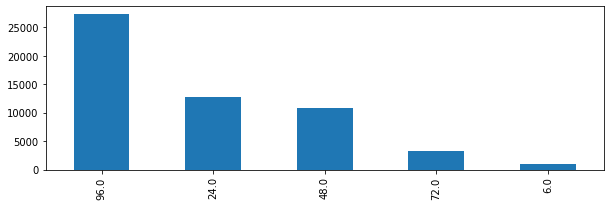

In [111]:
plt.figure(figsize = (10,3))
rpu.obs_duration_mean.value_counts()[rpu.obs_duration_mean.value_counts() > 1000].plot(kind = 'bar')

In [114]:
rp_impute_duration = rpu[rpu.obs_duration_mean.isin([24,48,72,96])].copy()

In [116]:
null_output_counts(rp_impute_duration)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,54160
test_id,0,51618
obs_duration_mean,0,4
endpoint,0,6
effect,0,3
measurement,0,6
conc1_type,3.17947,8
conc1_mean,2.49815,8831
conc1_unit,0.00923191,54
test_cas,0,3378


## Concentration
### conc1_mean/unit

In [17]:
def impute_conc(results_prefiltered):
    
    db = results_prefiltered.copy()
    
    to_drop_conc_mean = db[db.conc1_mean == 'NR'].index
    db_filtered_mean = db.drop(index = to_drop_conc_mean).copy()

    db_filtered_mean.loc[:,'conc1_mean'] = db_filtered_mean.conc1_mean\
                                                        .apply(lambda x: x.replace("*", "") if "*" in x else x).copy()

    to_drop_invalid_conc = db_filtered_mean[db_filtered_mean.conc1_mean == '>100000'].index
    db_filtered_mean.drop(index = to_drop_invalid_conc, inplace = True)

    db_filtered_mean.loc[:,'conc1_mean'] = db_filtered_mean.conc1_mean.astype(float).copy()

    to_drop_useless = db_filtered_mean[db_filtered_mean.conc1_mean == 0].index
    db_filtered_mean.drop(index = to_drop_useless, inplace = True)

    db_filtered_mean.loc[:,'conc1_unit'] = db_filtered_mean.conc1_unit\
                                                        .apply(lambda x: x.replace("AI ", "") if 'AI' in x else x)
    
    db_filtered_mean.loc[(db_filtered_mean.conc1_unit == 'ppb') | (db_filtered_mean.conc1_unit == 'ug/L'), 'conc1_mean'] = \
                db_filtered_mean.conc1_mean[(db_filtered_mean.conc1_unit == 'ppb') | (db_filtered_mean.conc1_unit == 'ug/L')]/1000
    
    db_filtered_mean.loc[db_filtered_mean.conc1_unit == 'ng/L', 'conc1_mean'] = db_filtered_mean.conc1_mean[db_filtered_mean.conc1_unit == 'ng/L']*(10**(-6))

    to_drop_unit = db_filtered_mean.loc[(db_filtered_mean.conc1_unit == 'uM') | (db_filtered_mean.conc1_unit == 'ul/L')].index
    db_filtered_mean.drop(index = to_drop_unit, columns = ['conc1_unit'], inplace = True)

    to_drop_type = db_filtered_mean.loc[(db_filtered_mean.conc1_type == 'NC') |(db_filtered_mean.conc1_type == 'NR')].index
    db_filtered_mean.drop(index = to_drop_type, inplace = True)
    
    return db_filtered_mean

In [18]:
db = impute_conc(rp)
null_output_counts(db)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,58438
test_id,0,55642
obs_duration_mean,0.836784,291
obs_duration_unit,0.297751,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,0,6
conc1_mean,0,7934
test_cas,0,3302


In [2]:
# elimino i valori NR
to_drop_conc_mean = rp[rp.conc1_mean == 'NR'].index
rpc = rp.drop(index = to_drop_conc_mean).copy()

# Sostituisco valori strani
rpc.loc[:,'conc1_mean'] = rpc.conc1_mean.apply(lambda x: x.replace("*", "") if "*" in x else x).copy()

# elimino valori vaghi
to_drop_invalid_conc = rpc[rpc.conc1_mean == '>100000'].index
rpc.drop(index = to_drop_invalid_conc, inplace = True)

# cambio tipo in float
rpc.loc[:,'conc1_mean'] = rpc.conc1_mean.astype(float).copy()

# elimino valori useless
to_drop_useless = rpc[rpc.conc1_mean == 0].index
rpc.drop(index = to_drop_useless, inplace = True)

# sostituisco Active Ingredient con solo unità 
print(rpc.conc1_unit.value_counts().head(10))
rpc.loc[:,'conc1_unit'] = rpc.conc1_unit.apply(lambda x: x.replace("AI ", "") if 'AI' in x else x)
print(rpc.conc1_unit.value_counts().head(6))

ug/L       36129
mg/L        8259
ppm         5241
AI ug/L     4597
AI mg/L     2678
ppb         1414
ul/L        1188
AI ppm       319
uM           309
AI ng/L      234
Name: conc1_unit, dtype: int64
ug/L    40726
mg/L    10937
ppm      5560
ppb      1642
ul/L     1236
uM        309
Name: conc1_unit, dtype: int64


Conversion:

1 ppb = 1 ug/L = 1000 mg/L

1 ng/L = 10^-6 mg/L

1 ppm = 1 mg/L

uM e ul/L non convertibili

In [3]:
# Converto
rpc.loc[(rpc.conc1_unit == 'ppb') | (rpc.conc1_unit == 'ug/L'), 'conc1_mean'] = \
            rpc.conc1_mean[(rpc.conc1_unit == 'ppb') | (rpc.conc1_unit == 'ug/L')]/1000
rpc.loc[rpc.conc1_unit == 'ng/L', 'conc1_mean'] = rpc.conc1_mean[rpc.conc1_unit == 'ng/L']*(10**(-6))

# Elimino inconvertibili
to_drop_unit = rpc.loc[(rpc.conc1_unit == 'uM') | (rpc.conc1_unit == 'ul/L')].index
rpc.drop(index = to_drop_unit, columns = ['conc1_unit'], inplace = True)


### conc1_type

In [4]:
# Non posso imputare
to_drop_type = rpc.loc[(rpc.conc1_type == 'NC') |(rpc.conc1_type == 'NR')].index
rpc.drop(index = to_drop_type, inplace = True)

In [5]:
null_output_counts(rpc)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,58438
test_id,0,55642
obs_duration_mean,0.836784,291
obs_duration_unit,0.297751,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,0,6
conc1_mean,0,9781
test_cas,0,3302


## Tests

In [19]:
def impute_test_feat(results_prefiltered):
    
    db = results_prefiltered.copy()
    
    db.loc[:,'exposure_type'] = db.exposure_type.apply(lambda x: x.replace("/", ""))
    db.loc[:,'exposure_type'] = db.exposure_type.apply(lambda x: x.replace("AQUA - NR", "AQUA") if "AQUA" in x else x)
    db.loc[:, 'exposure_type'] = db.exposure_type.apply(lambda x: 'AQUA' if 'NR' in x else x)
    
    db.drop(columns = ['test_location'], inplace = True)
    
    db.loc[:, 'control_type'] = db.control_type.apply(lambda x: x.replace("/", ""))
    db.loc[:, 'control_type'] = db.control_type.apply(lambda x: "Unknown" if "NR" in x else x)
    
    db.loc[:,'media_type'] = db.media_type.apply(lambda x: x.replace("/", ""))
    to_drop_media = db[db.media_type.isin(['NR', 'CUL', 'NONE', 'NC'])].index
    db.drop(index = to_drop_media, inplace = True)
    
    db.loc[:,'application_freq_unit'] = db.application_freq_unit.apply(lambda x: "X" if ('NR' in x) | ('NC' in x) else x) 
    
    return db

In [20]:
db = impute_test_feat(rp)
null_output_counts(db)

C:\Users\Simone\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,null_values_inc_NC_NR%,#outputs
result_id,0,64322
test_id,0,61074
obs_duration_mean,1.77855,310
obs_duration_unit,0.296944,13
endpoint,0,6
effect,0,4
measurement,0,7
conc1_type,2.69892,8
conc1_mean,4.0717,9494
conc1_unit,0.00777339,61


### exposure_type

In [14]:
# Levo caratteri non rilevanti
rp.loc[:,'exposure_type'] = rp.exposure_type.apply(lambda x: x.replace("/", ""))

In [3]:
rp.exposure_type.value_counts()

S            38260
F            13443
R             6553
NR            5354
AQUA - NR      497
P              141
E               48
O               19
IP              13
OR               4
FD               3
IV               3
SP               1
IJ               1
SC               1
Name: exposure_type, dtype: int64

In [15]:
# Sapendo che i pesci vivono in acqua imputo con la categoria AQUA
# Ci sono altri modi per imputare?
rp.loc[:,'exposure_type'] = rp.exposure_type.apply(lambda x: x.replace("AQUA - NR", "AQUA") if "AQUA" in x else x)

rp.loc[:, 'exposure_type'] = rp.exposure_type.apply(lambda x: 'AQUA' if 'NR' in x else x)


In [5]:
rp.exposure_type.value_counts()

S       38260
F       13443
R        6553
AQUA     5851
P         141
E          48
O          19
IP         13
OR          4
FD          3
IV          3
SP          1
IJ          1
SC          1
Name: exposure_type, dtype: int64

### test_location

La maggior parte degli esperimenti sono stati effettuati in laboratorio, non ritengo opportuno mantenere test_location tra le variabili

In [10]:
rp.test_location.value_counts()

LAB       63463
NR          807
FIELDA       50
FIELDN       21
Name: test_location, dtype: int64

In [56]:
rp.drop(columns = ['test_location'], inplace = True)

### control_type

In [11]:
rp.control_type.value_counts()

C     22635
I     14456
S      9003
NR     8436
K      4285
V      2478
M      2252
M/      618
U       147
O        18
P         8
B         5
Name: control_type, dtype: int64

In [4]:
rp.loc[:, 'control_type'] = rp.control_type.apply(lambda x: x.replace("/", ""))
rp.loc[:, 'control_type'] = rp.control_type.apply(lambda x: "Unknown" if "NR" in x else x)

### media_type
Tengo FW e SW che mi indicano se il pesce è di acqua salata (Salt Water) o di acqua dolce (Fresh water)

In [2]:
rp.loc[:,'media_type'] = rp.media_type.apply(lambda x: x.replace("/", ""))

In [3]:
to_drop_media = rp[rp.media_type.isin(['NR', 'CUL', 'NONE', 'NC'])].index
rpm = rp.copy()
rpm.drop(index = to_drop_media, inplace = True)

In [7]:
tmp = rpm.copy()
tmp['fish'] = tmp['class'] + ' ' + tmp['tax_order'] +' '+ tmp['family'] +' '+ tmp['genus'] +' '+ tmp['species']
a = tmp.groupby(['fish']).first()
a.media_type.value_counts()

FW    416
SW    164
Name: media_type, dtype: int64

## application_freq_unit

In [8]:
rp.application_freq_unit.value_counts()

X                  38345
CON                13452
NR                  9947
E X H               1322
DLY                  748
NC                   184
E X D                 91
X per D               54
EOD                   50
DLY for X D           39
X per 24 H            25
X per WK               9
Xfor4H,24H apt         8
Xfor2.5H,8H apt        7
Xfor6H,12H apt         7
Xfor4H,8H apt          7
X MI E8H               6
DLY for 2 H            6
Xfor4H,12H apt         5
X, 1X/wk               4
Xfor12H,24H apt        4
X for 60 MI            4
X per 2D               4
X, 1X/D                3
WKY                    3
H                      3
X for 24 H             2
X E2D                  2
Name: application_freq_unit, dtype: int64

In [9]:
# imputo con la classe più frequente
rp.loc[:,'application_freq_unit'] = rp.application_freq_unit.apply(lambda x: "X" if ('NR' in x) | ('NC' in x) else x) 

# Filtering best features

# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

db = pd.read_csv('data/lc_db_processed.csv').drop(columns = ['Unnamed: 0'])
print(db.shape)
db.head()

(26836, 25)


,test_cas,obs_duration_mean,conc1_type,species,exposure_type,control_type,media_type,application_freq_unit,conc1_mean,class,...,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,oh_count
0,50-00-0,24.0,A,affinis,R,C,FW,E X H,100.00,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
1,50-00-0,48.0,A,affinis,R,C,FW,E X H,97.00,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
2,50-00-0,72.0,A,affinis,R,C,FW,E X H,94.00,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
3,50-00-0,96.0,A,affinis,R,C,FW,E X H,90.00,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
4,50-00-0,96.0,A,affinis,S,C,FW,X,133.55,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0


In [3]:
db.describe()

,obs_duration_mean,conc1_mean,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,oh_count
count,26836.000000,2.683600e+04,26836.000000,26836.000000,26836.000000,26836.000000,26836.000000,26836.000000,26836.000000,26836.000000,26836.000000,26836.000000
mean,66.170815,3.584443e+02,0.434482,1.391079,0.489027,1.248621,0.056976,1.181920,0.598545,1.070289,1.663731,0.238560
std,30.085451,3.273501e+03,0.133564,2.215640,0.192204,1.284109,0.263971,1.390911,0.115442,0.335783,3.552222,0.789316
min,24.000000,5.200000e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204918,-24.338100,0.000000
25%,48.000000,2.400000e-01,0.353921,0.000000,0.396102,0.000000,0.000000,0.000000,0.538220,0.842105,-0.002500,0.000000
50%,72.000000,3.200000e+00,0.454823,1.000000,0.551240,1.000000,0.000000,1.000000,0.623404,1.125000,2.292400,0.000000
75%,96.000000,3.000000e+01,0.534913,2.000000,0.619731,2.000000,0.000000,2.000000,0.680548,1.250000,3.732100,0.000000
max,96.000000,2.930000e+05,1.000000,45.000000,1.000000,18.000000,6.000000,14.000000,1.000000,2.000000,13.789100,25.000000


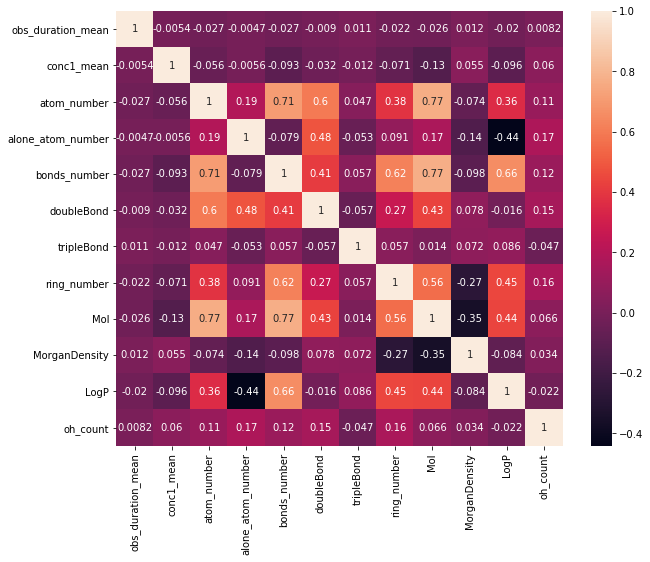

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
cor = db.corr()
sns.heatmap(cor, annot = True)

## Chemical Clustering 

In [2]:
import pandas as pd
import numpy as np

csp = pd.read_csv('data/cas_smiles_pubchem2d.csv').drop(columns = ['Unnamed: 0'])
csp.head()

,test_cas,smiles,pubchem2d
0,1071-83-6,OC(=O)CNC[P](O)(O)=O,1100000001000010001110000000001000000000000000...
1,2896-70-0,CC1(C)CC(=O)CC(C)(C)N1[O],1110000001110010001100000000000000000000000000...
2,13457-18-6,CCOC(=O)c1cn2nc(O[P](=S)(OCC)OCC)cc2nc1C,1110000001110011001110000000001001000000000000...
3,5829-48-1,CCCCCCCCC(Cl)C(Cl)CCCCCCCC(O)=O,1111000001111000001100000000000000000110000000...
4,50-29-3,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,1100000001110000000000000000000000000111000000...


In [3]:
from rdkit.DataStructs.cDataStructs import CreateFromBitString
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoDistMat
from scipy.spatial.distance import squareform

tanimoto_matrix = squareform(GetTanimotoDistMat(csp['pubchem2d'].apply(CreateFromBitString).to_list()))

In [ ]:
import seaborn as sns

sns.clustermap(tanimoto_matrix)

C:\Users\Matteo\anaconda3\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Matteo\anaconda3\lib\site-packages\seaborn\matrix.py:595: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
